In [2]:
import numpy as np
import pandas as pd
import os
import nltk
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [3]:
"""
files = os.listdir('data')
dct = dict()
for file in files:
    path = os.path.join('data', file)
    df = pd.read_csv(path)
    dct[file] = df.shape
    print(df.head())

print(dct)
"""

"\nfiles = os.listdir('data')\ndct = dict()\nfor file in files:\n    path = os.path.join('data', file)\n    df = pd.read_csv(path)\n    dct[file] = df.shape\n    print(df.head())\n\nprint(dct)\n"

In [4]:
path = 'data/birth_year.csv'
df_birthyear = pd.read_csv(path)
df_birthyear.sort_values(by="birth_year", ascending=True, inplace=True)
df_birthyear.head()

,auhtor_ID,post,birth_year
28446,t2_9v6260me,a trope among this sub and almost everyone joi...,1948
28445,t2_9v6260me,door question” decorated with an extreme helpi...,1948
28444,t2_9v6260me,"Unless you live at home, why would you put up ...",1948
28456,t2_9v6260me,my mind) any possibility of another religion b...,1948
28457,t2_9v6260me,and our mental health is linked to our physica...,1948


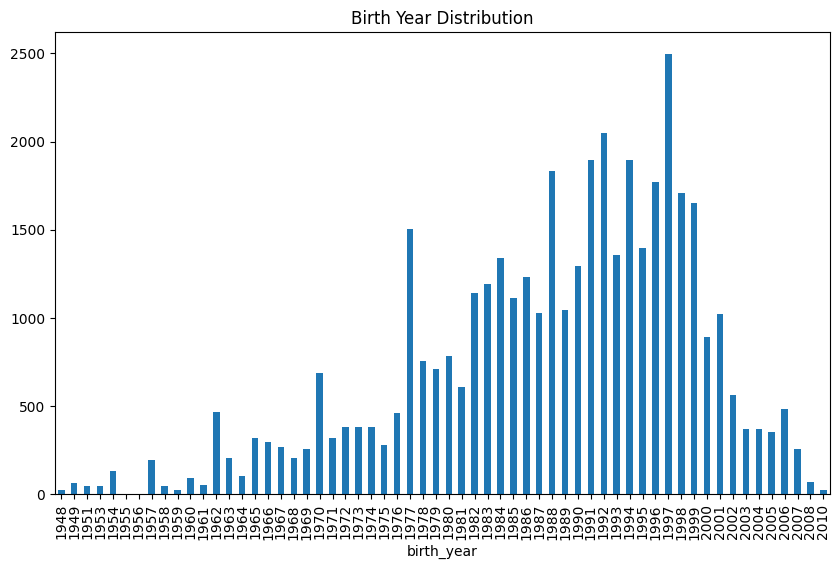

In [5]:
# plot a piechart with birth years
df_count = df_birthyear.value_counts('birth_year').sort_index()
fig = plt.figure(figsize=(10, 6))
ax = df_count.plot.bar()
plt.title('Birth Year Distribution');

Continue with this website, implement the spacy things to clean the data: https://course.spacy.io/en/chapter1

# Preprocessing using nltk

In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt_tab')
import contractions
import unicodedata
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zitag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\zitag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [13]:
df_birthyear['clean_post'] = np.nan

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_post(post):
    words = word_tokenize(post.lower())
    words = [contractions.fix(word) for word in words]
    words = [unicodedata.normalize('NFKD', word).encode('ASCII', 'ignore').decode('utf-8') for word in words]
    words = [re.sub(r"(https|http)?:\S*", "", word) for word in words]
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return str(words)

tqdm.pandas()
df_birthyear['clean_post'] = df_birthyear['post'].progress_apply(clean_post)

100%|██████████| 41873/41873 [14:23<00:00, 48.49it/s]


In [14]:
df_birthyear.head()

,auhtor_ID,post,birth_year,clean_post
28446,t2_9v6260me,a trope among this sub and almost everyone joi...,1948,"['trope', 'among', 'sub', 'almost', 'everyon',..."
28445,t2_9v6260me,door question” decorated with an extreme helpi...,1948,"['door', 'question', 'decor', 'extrem', 'help'..."
28444,t2_9v6260me,"Unless you live at home, why would you put up ...",1948,"['unless', 'live', 'home', 'would', 'put', 'ki..."
28456,t2_9v6260me,my mind) any possibility of another religion b...,1948,"['mind', 'possibl', 'anoth', 'religion', 'wort..."
28457,t2_9v6260me,and our mental health is linked to our physica...,1948,"['mental', 'health', 'link', 'physic', 'health..."


In [15]:
# to pickle
df_birthyear.to_pickle('df_birthyear.pkl')

## Function breakdown

In [16]:
i = random.randint(0, len(df_birthyear))
post = df_birthyear['post'][i]
print(post)

remember where I was and what I was doing when I heard the news. There was something about it that made it very sad compared to the numerous untimely deaths of celebrities that make the news. I suspect what made it so sad was how much he was enjoying life after basketball. He came off as so competitive that some thought that he would have trouble with life after basketball but it was quite the opposite. Why does the reason even matter if you've made up your mind that you're going to block him on everything? INFO: Why was Shaun's ex there? How did your relationship with Shaun start. Your MIL could have dragged the chair from the kitchen. What were you supposed to do? There were no chairs. Did they think you would have just left and went home since there were no chairs? It's almost as if they just didn't want you to be there. It may not be that simple though. What if Julissa had kids with Shaun (which is why she's there with Shaun) and Shaun's relationship with the OP started as an affai

### Tokenization
split the sentence up in to smaller part, here it is split up into words

In [17]:
words = word_tokenize(post.lower())
print(words)

['remember', 'where', 'i', 'was', 'and', 'what', 'i', 'was', 'doing', 'when', 'i', 'heard', 'the', 'news', '.', 'there', 'was', 'something', 'about', 'it', 'that', 'made', 'it', 'very', 'sad', 'compared', 'to', 'the', 'numerous', 'untimely', 'deaths', 'of', 'celebrities', 'that', 'make', 'the', 'news', '.', 'i', 'suspect', 'what', 'made', 'it', 'so', 'sad', 'was', 'how', 'much', 'he', 'was', 'enjoying', 'life', 'after', 'basketball', '.', 'he', 'came', 'off', 'as', 'so', 'competitive', 'that', 'some', 'thought', 'that', 'he', 'would', 'have', 'trouble', 'with', 'life', 'after', 'basketball', 'but', 'it', 'was', 'quite', 'the', 'opposite', '.', 'why', 'does', 'the', 'reason', 'even', 'matter', 'if', 'you', "'ve", 'made', 'up', 'your', 'mind', 'that', 'you', "'re", 'going', 'to', 'block', 'him', 'on', 'everything', '?', 'info', ':', 'why', 'was', 'shaun', "'s", 'ex', 'there', '?', 'how', 'did', 'your', 'relationship', 'with', 'shaun', 'start', '.', 'your', 'mil', 'could', 'have', 'dragge

### Removing all characters except letters

idea: maybe we should keep exclamantion/question marks and other characters, like ;) that could predict age potentially

In [18]:
words = [word for word in words if word.isalpha()]
print(words)

['remember', 'where', 'i', 'was', 'and', 'what', 'i', 'was', 'doing', 'when', 'i', 'heard', 'the', 'news', 'there', 'was', 'something', 'about', 'it', 'that', 'made', 'it', 'very', 'sad', 'compared', 'to', 'the', 'numerous', 'untimely', 'deaths', 'of', 'celebrities', 'that', 'make', 'the', 'news', 'i', 'suspect', 'what', 'made', 'it', 'so', 'sad', 'was', 'how', 'much', 'he', 'was', 'enjoying', 'life', 'after', 'basketball', 'he', 'came', 'off', 'as', 'so', 'competitive', 'that', 'some', 'thought', 'that', 'he', 'would', 'have', 'trouble', 'with', 'life', 'after', 'basketball', 'but', 'it', 'was', 'quite', 'the', 'opposite', 'why', 'does', 'the', 'reason', 'even', 'matter', 'if', 'you', 'made', 'up', 'your', 'mind', 'that', 'you', 'going', 'to', 'block', 'him', 'on', 'everything', 'info', 'why', 'was', 'shaun', 'ex', 'there', 'how', 'did', 'your', 'relationship', 'with', 'shaun', 'start', 'your', 'mil', 'could', 'have', 'dragged', 'the', 'chair', 'from', 'the', 'kitchen', 'what', 'were'

### Removing stopwords
Stopwords are frequently occurring words in a language that are frequently omitted from natural language processing (NLP) tasks due to their low significance for deciphering textual meaning. The particular list of stopwords can change based on the language being studied and the context. The following is a broad list of stopword categories:

*Common Stopwords*: These are the most frequently occurring words in a language and are often removed during text preprocessing. Examples include “the,” “is,” “in,” “for,” “where,” “when,” “to,” “at,” etc.

*Custom Stopwords*: Depending on the specific task or domain, additional words may be considered as stopwords. These could be domain-specific terms that don’t contribute much to the overall meaning. For example, in a medical context, words like “patient” or “treatment” might be considered as custom stopwords.

*Numerical Stopwords*: Numbers and numeric characters may be treated as stopwords in certain cases, especially when the analysis is focused on the meaning of the text rather than specific numerical values

*Single-Character Stopwords*: Single characters, such as “a,” “I,” “s,” or “x,” may be considered stopwords, particularly in cases where they don’t convey much meaning on their own.

*Contextual Stopwords*: Words that are stopwords in one context but meaningful in another may be considered as contextual stopwords. For instance, the word “will” might be a stopword in the context of general language processing but could be important in predicting future events.

In [19]:
words = [word for word in words if word not in stopwords.words('english')]  #removes english stopwords
print(words)

['remember', 'heard', 'news', 'something', 'made', 'sad', 'compared', 'numerous', 'untimely', 'deaths', 'celebrities', 'make', 'news', 'suspect', 'made', 'sad', 'much', 'enjoying', 'life', 'basketball', 'came', 'competitive', 'thought', 'would', 'trouble', 'life', 'basketball', 'quite', 'opposite', 'reason', 'even', 'matter', 'made', 'mind', 'going', 'block', 'everything', 'info', 'shaun', 'ex', 'relationship', 'shaun', 'start', 'mil', 'could', 'dragged', 'chair', 'kitchen', 'supposed', 'chairs', 'think', 'would', 'left', 'went', 'home', 'since', 'chairs', 'almost', 'want', 'may', 'simple', 'though', 'julissa', 'kids', 'shaun', 'shaun', 'shaun', 'relationship', 'op', 'started', 'affair', 'shaun', 'married', 'julissa', 'shaun', 'family', 'like', 'op', 'asked', 'information', 'maybe', 'shaun', 'kids', 'julissa', 'shaun', 'family', 'hates', 'op', 'much', 'relationship', 'started', 'op', 'woman', 'op', 'conveniently', 'leaving', 'lots', 'information', 'redditors', 'life', 'experience', 'no

In [20]:
word_freq = Counter(words)
print(word_freq.most_common(10))

[('would', 16), ('shaun', 13), ('op', 13), ('relationship', 9), ('think', 9), ('like', 8), ('even', 7), ('want', 7), ('life', 6), ('made', 5)]
